# Statistical *Power*, Effect Size, and Error
![tiger1](./img/tiger.jpg)

## Agenda today:
- Review p-value, hypothesis testing, and two types of error
- Introduction to power, power analysis, and analyze power using numpy 
- Learn the expected t value and its relationship to effect size 
- Case study

## Scenario

Suppose you are launching a pilot study with Instagram and you want to examine the new feature (making the heart when you "like" someone's photo red instead of white) developed by the frontend engineer attracted more likes given other variables are being held constant. You have collected two datasets.

## Learning goals
After today, you'll be able to...
- Visualize and explain effect size in python
- Conduct power analysis in python
- Explain what power and power analysis are in context  
- Explain type I and type II error in specific context

## Part 1. Effect Size
Effect size is used to quantify the size of the difference between two groups under observation. Effect sizes are easy to calculate, understand and apply to any measured outcome and is applicable to a multitude of study domains. It is highly valuable towards quantifying the effectiveness of a particular intervention, relative to some comparison. Measuring effect size allows scientists to go beyond the obvious and simplistic, 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?'.

### Where does gender have a larger effect?

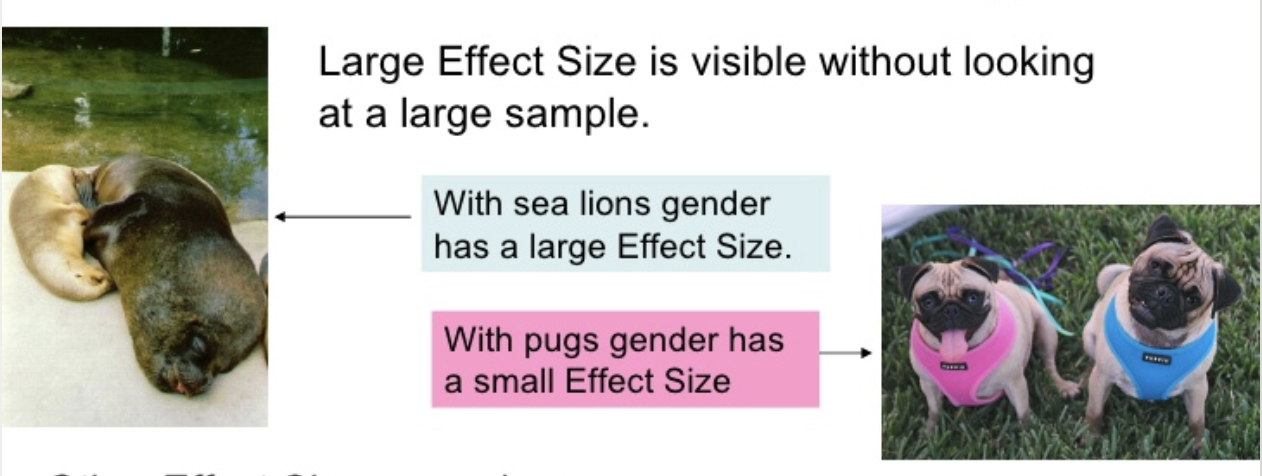

### Effect size and perspective 

Calculating effect size on your experiment put things in perspectives for you - in the context of your experiment, you are more likely to learn why and how you achieved significant conclusions as a result of effect size. For example, if you performed an A/B test on examining whether changing the like button on instagram resulted in people pressing more likes, you want to be cautious on the effect size of the samples you are comparing. 

### Specifically, knowing the effect size helps you with:

- Communicate practical significance of results. An effect might be statistically significant, but does it matter in practical scenarios ?

- Effect size calculation and interpretation allows you to draw Meta-Analytical conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the tur effect size of the population.

- Perform Power Analysis , which help determine the number of particicpants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one.

### Example
Compare effect size of gender in height

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.power import TTestIndPower

warnings.filterwarnings("ignore")
np.random.seed(10)

In [2]:
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = stats.norm(male_mean, male_sd)

female_mean = 163
female_sd = 7.3
female_height = stats.norm(female_mean, female_sd)


In [5]:
def evaluate_pdf(rv, x=4):
    '''
    Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''

    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)

    # Calculate the peak of normal distribution i.e. probability density.
    ys = rv.pdf(xs)

    return xs, ys

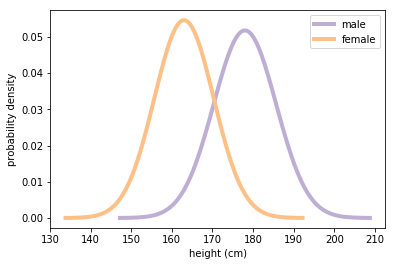

In [6]:
# Male height
xs, ys = evaluate_pdf(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_pdf(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
plt.ylabel('probability density')
plt.legend()
plt.show()

### Cohen's $d$, standardized metrics for effect size
Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = effect size (difference of means) / pooled standard deviation;

$d = \frac{\mu1 - \mu2}{\sigma pooled}$

The power is __not__ the same as $d$, but it is dependent on the expected t value,represented by $\delta$, calculated by:

$\delta = $d$\sqrt \frac{n}{2}$

We can then use the power table to find the power

In [14]:
def cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1 + n2 - 1 - 1)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [15]:
np.random.seed(10)
# x1 = np.random.normal(male_mean, male_sd, 1000)
# x2 = np.random.normal(female_mean, female_sd, 1000)

female_sample = female_height.rvs(1000)
male_sample = male_height.rvs(1000)

effect = cohen_d(female_sample, male_sample)
print(effect)

-2.0676221865254156


#### Evaluating Effect Size

[good demo here](https://rpsychologist.com/d3/cohend/)

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

In [12]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = stats.norm(0, 1)
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_pdf(group1)
    plt.fill_between(xs, ys, label='Standard Normal', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_pdf(group2)
    plt.fill_between(xs, ys, label='Cohens d', color='#376cb0', alpha=0.7)
    plt.legend()

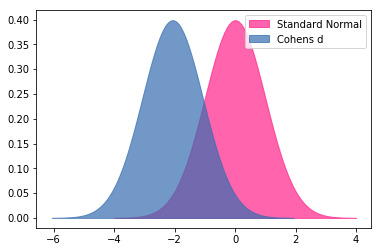

In [13]:
plot_pdfs(effect)

## Part 2. Error
When conducting hypothesis testing, we __choose__ a value for alpha, which represents the margin of error we are allowing. Remember, alpha represents the probability in which we are allowed to take the risk of falsely rejecting the null hypothesis. By convention, we set the alpha at 0.05, which we can interpret as "for 5% of the time, we are willing to reject the null hypothesis when it is in fact true". How, then, do we categorize different types of error associated with conducting the experiments?

#### Type I error
Type I error is usually represented as $\alpha$, which is the probability of rejecting the null hypothesis when it is in fact true. 

For example, if we compare the height of males and females in a sample, with $\mu$m = 175cm, $\sigma$m = 4cm, and $\mu$f = 170 cm, $\sigma$f = 2.5cm, the __null hypothesis__ would be: there is no difference of heights in two genders. After conducting the appropriate statistical testing and attaining an alpha of .04, we conclude that there is a significant difference in gender. However, the reality is there is no difference. 

#### Type II Error
Type II error is represented as $\beta$, it is the probability of failing to reject the null when it is in fact false. Applying to our case above, we would have said that the two genders do not differ in heights when they in fact do.

## Part 3. Power
How does statistical power relate to two types of error? Power is defined as the __probability of not making a Type
II error__ (i.e., probability of correctly rejecting H0 when it is in fact false).

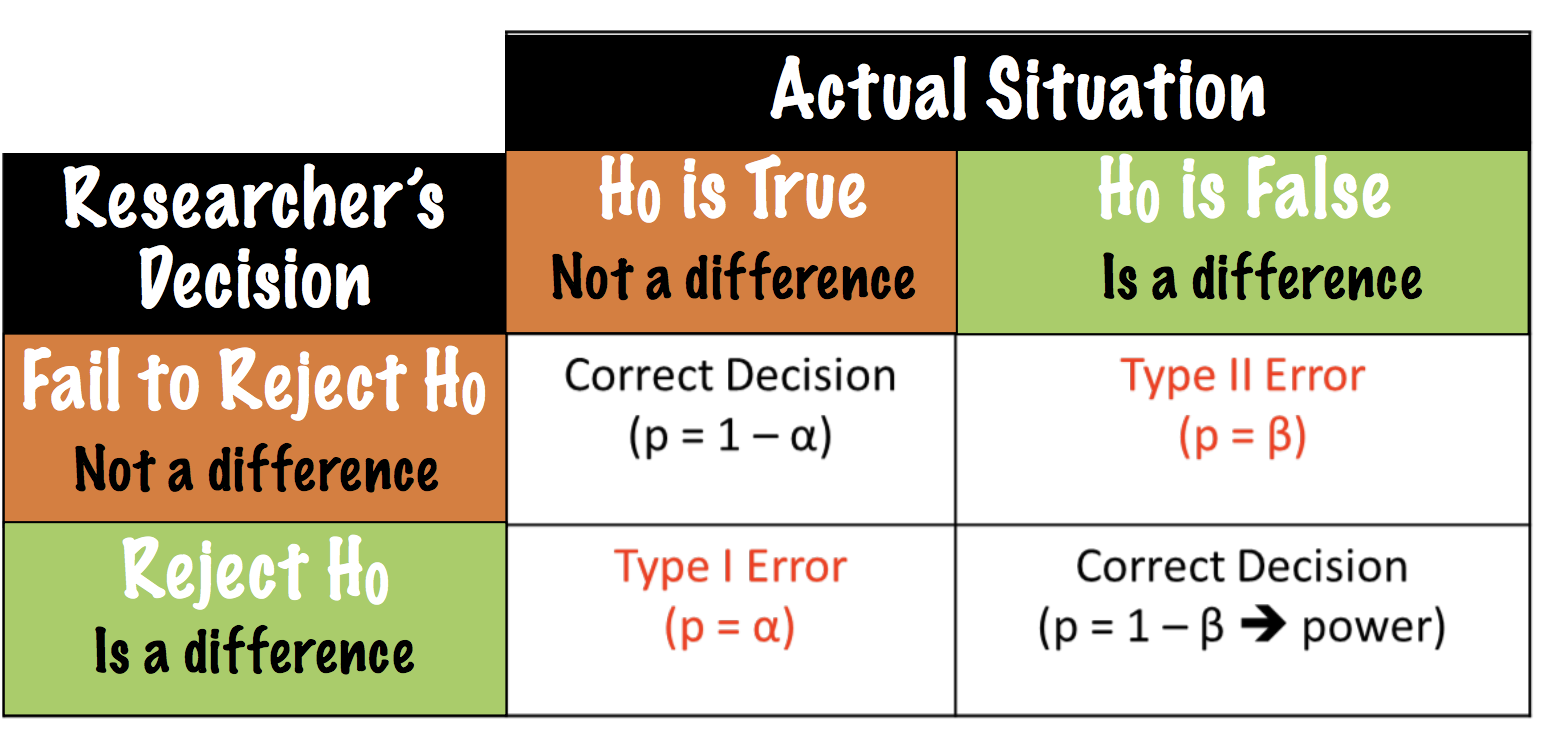

__<center>Power visualized </center>__

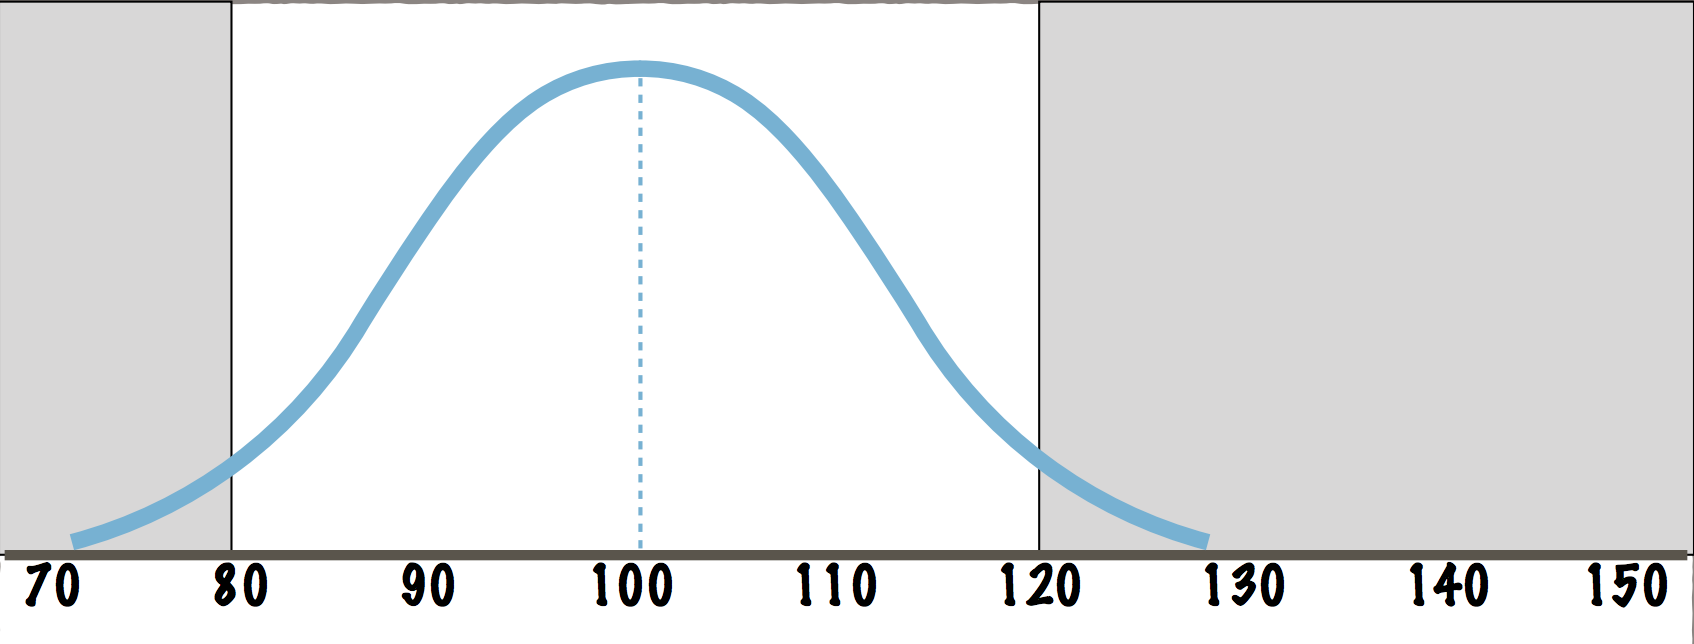

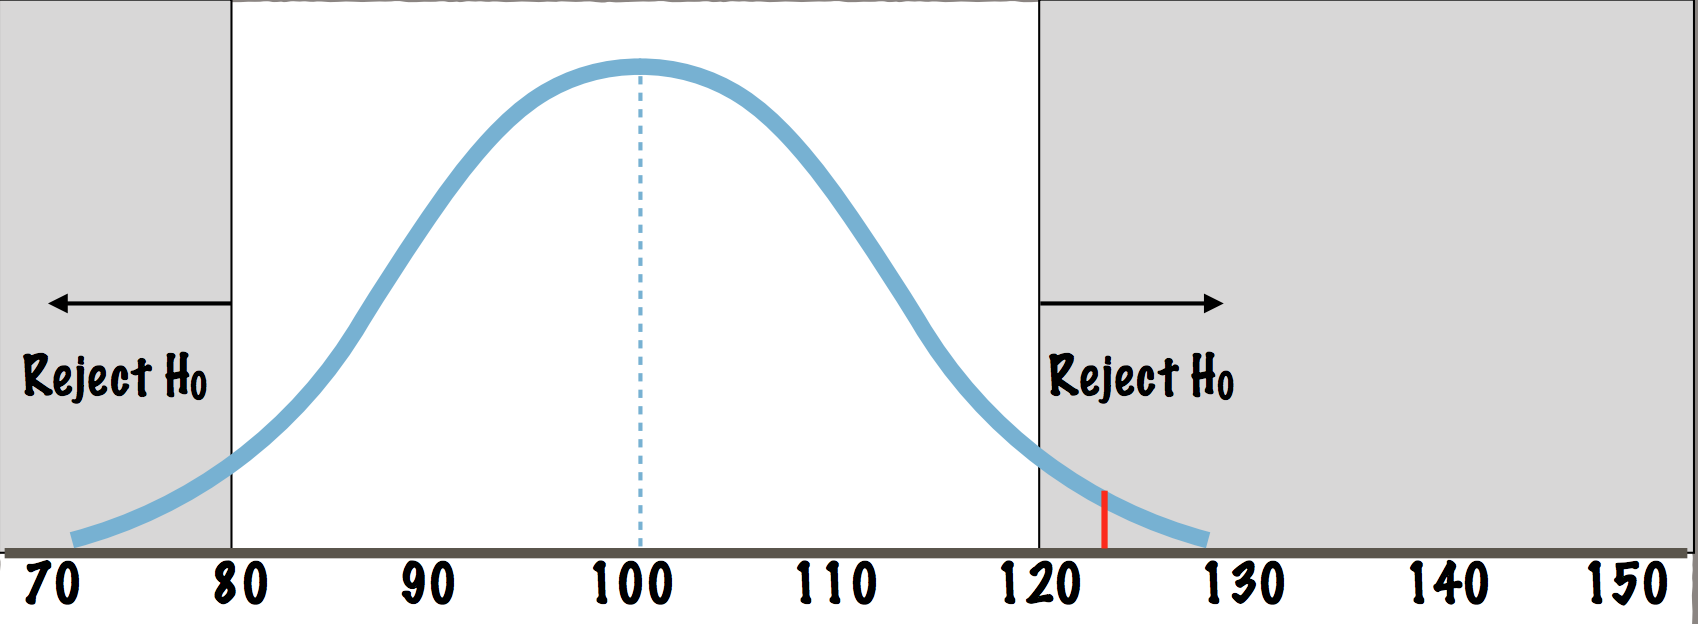

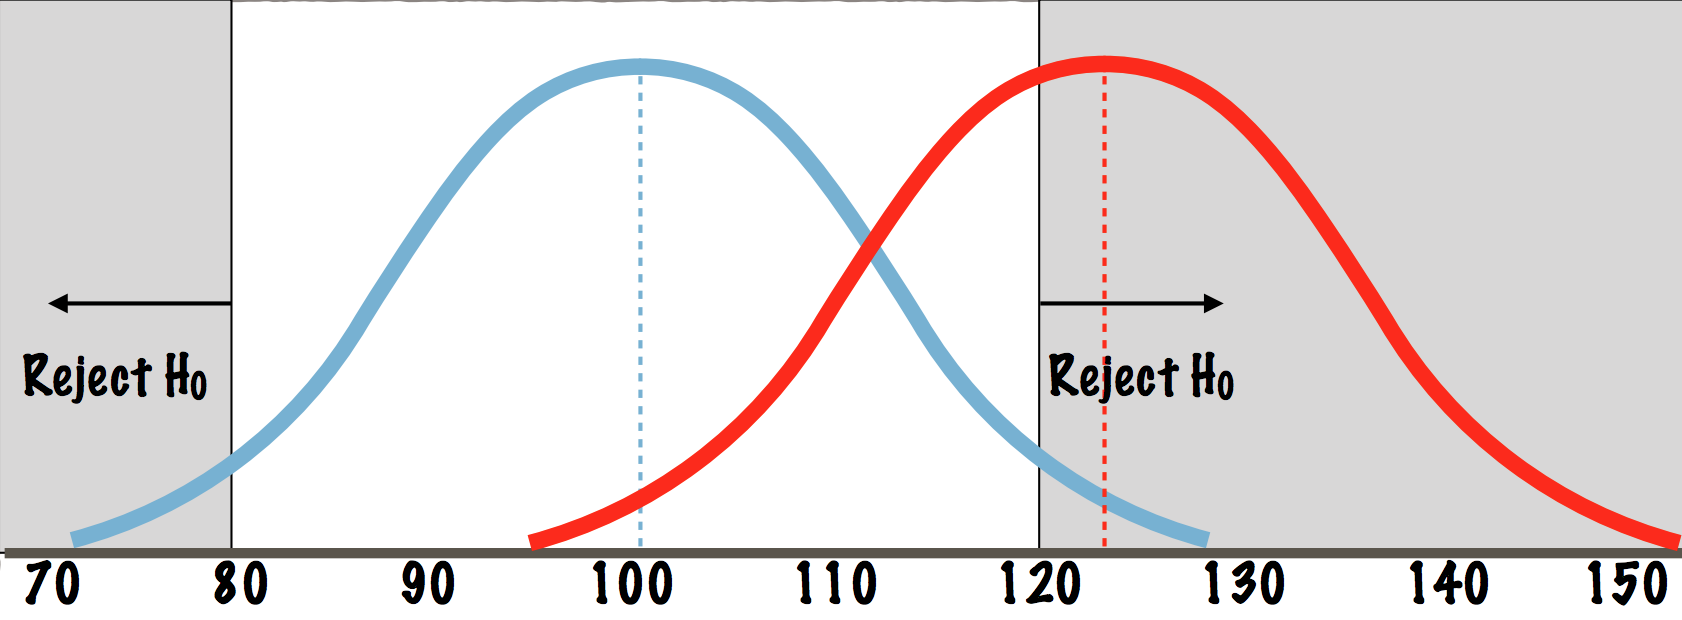

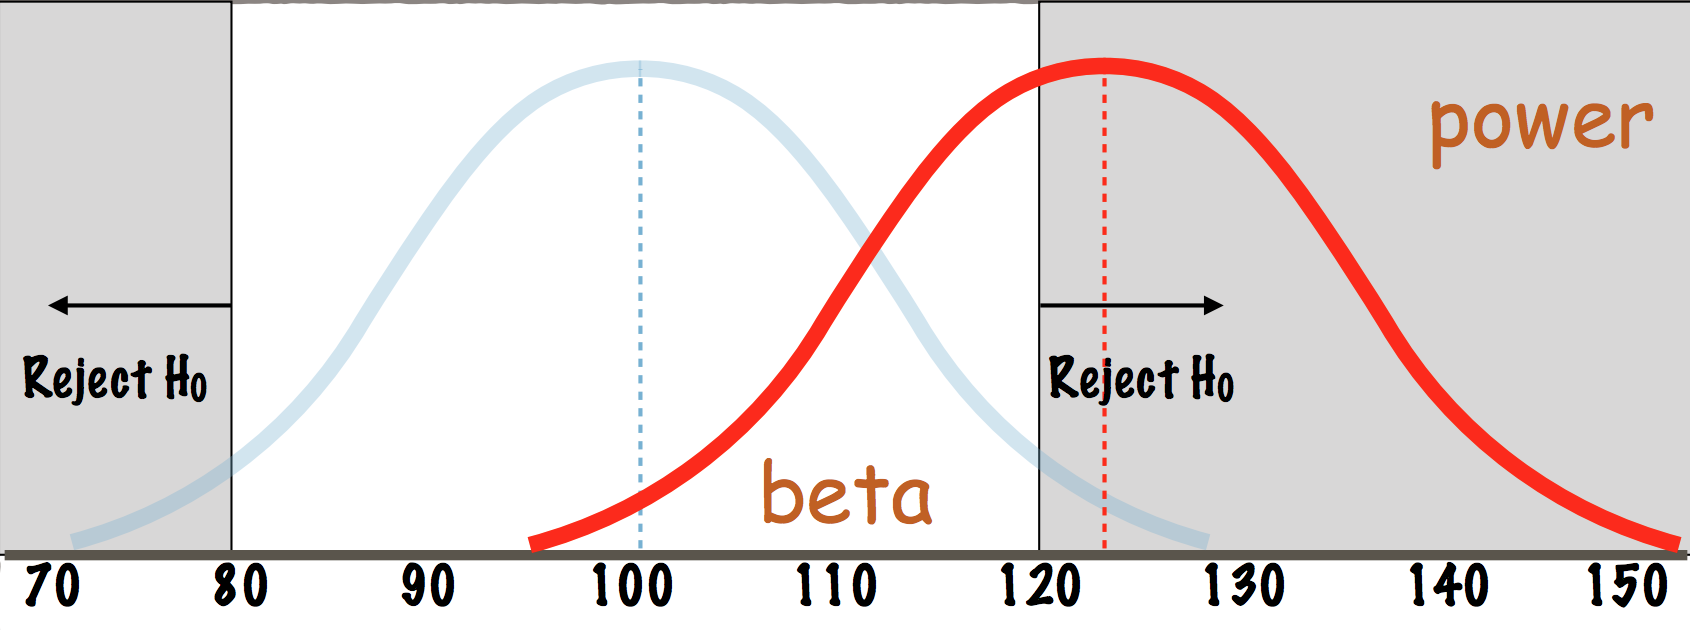

Relevance of Power?
- Low Statistical Power: Large risk of committing Type II errors, e.g. a false negative.
- High Statistical Power: Small risk of committing Type II errors.

Elements that affect power:
- Effect Size
- Sample Size (and thus Standard Error)
- Alpha

how does sample size affect power?

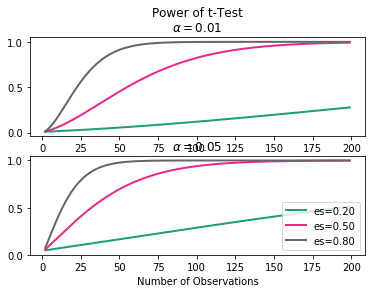

In [16]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2, 1, 2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs=np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')

### What is the formula for calculating power?

Power is usually complex to calculate, but with the help of computers and tables, we can calculate the $\delta$, or expected t value, and find out the values for power.

Examples of power tables:
- [full power table](http://www.pilesofvariance.com/Chapter13/Cohen_Power_Tables.pdf)

How you might see one in a journal:

![imgpower](http://www.ijaweb.org/articles/2016/60/9/images/IndianJAnaesth_2016_60_9_652_190621_t1.jpg)

There are other non-parametric ways of defining effect size. However, they will not be discussed here further.

## Part 4. Case Study 
Suppose you are launching a pilot study with Instagram and you want to examine the new feature (making the heart when you "like" someone's photo red instead of white) developed by the frontend engineer attracted more likes __given__ other variables are being held constant. You have collected two datasets. 

In [17]:
experiment = pd.read_csv('ig_experiment.csv')
control = pd.read_csv('ig_control.csv')

### Look at the data

In [18]:
experiment.head()

,Unnamed: 0,ID_Exp,Likes_Given_Exp,Avg_Likes_Given_Exp
0,0,1,47,50
1,1,2,54,54
2,2,3,52,59
3,3,4,54,45
4,4,5,45,55


In [19]:
control.head()

,Unnamed: 0,ID_Con,Likes_Given_Con,Avg_Likes_Given_Con
0,0,1,59,50
1,1,2,50,52
2,2,3,55,53
3,3,4,52,52
4,4,5,59,52


#### Solve for sample size

We can use `TTestIndPower.solve_power` from `statsmodels` to find the sample size you need.

[documentation here](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)

In [ ]:
TTestIndPower.

In [20]:
# before we even start the experiment, we want to know in order to attain a power of .8 given an alpha of .05,
# how many observations we need 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

25.52457250047935

In [22]:
print(experiment.shape)
print(control.shape)

(35, 4)
(35, 4)


Luckily, we do have enough observations to conduct this experiment!

In [23]:
# conducting a T Test
stats.ttest_ind(experiment['Likes_Given_Exp'],control['Likes_Given_Con'])

Ttest_indResult(statistic=-4.151776346992102, pvalue=9.403361597139248e-05)

however, this could still be a result of other factors other than the new plug in, so let's conduct a t-test on the average likes given 

In [24]:
stats.ttest_ind(experiment['Avg_Likes_Given_Exp'],control['Avg_Likes_Given_Con'])
# as we can see, they do not diff significantly in the average amount of likes given

Ttest_indResult(statistic=-1.0528245944679775, pvalue=0.29614821978985423)

visualize the effect size of the study 

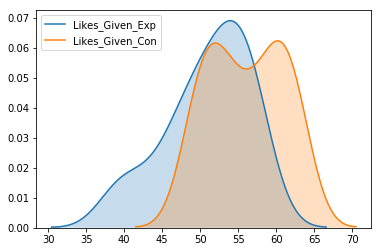

In [25]:
sns.kdeplot(experiment['Likes_Given_Exp'], shade = True)
sns.kdeplot(control['Likes_Given_Con'], shade = True)

Calculate the effect size 

In [26]:
exp_mean = experiment['Likes_Given_Exp'].mean()
con_mean = control['Likes_Given_Con'].mean()

# pooled variance
pooled_var = ((35-1)*np.var(experiment['Likes_Given_Exp']) + (35-1)*np.var(control['Likes_Given_Con'])) / (70-2)
print(pooled_var)

25.795918367346943


Mean of control

In [27]:
con_mean

56.08571428571429

Calculate Effect size

In [31]:
effect_sizes = (exp_mean - con_mean) / pooled_var**.5
effect_sizes

-1.0069536713287928

Calculate Cohen

In [32]:
cohen_d(experiment['Likes_Given_Exp'], control['Likes_Given_Con'])

-0.9924643738965597

#### use the effect size to solve for power 

$\delta = $d$\sqrt \frac{n}{2}$ = $\delta = $4.15$\sqrt \frac{35}{2}$ = 17.36

In [33]:
4.15*((35/2)**0.5)
# given that the expected t value is so high, the power is around 1. How do you interpret that?

17.36069555058207

https://clincalc.com/Stats/Power.aspx

- What is an implication of having such high power in this context?
- What would be type I error in this context?
- What would be type II error in this context?

#### Addendum 

When to use Student's vs Welch's t-test

Students:
![student](./img/student_t.png)



Welch's:
![welch](./img/welchs_t.png)



